In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

**Test statisici**

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. 
Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi. 

1. Importiamo il dataset:

In [2]:
integrate_titles = pd.read_csv("integrate_titles_3.csv")

visualizziamo il dataset

In [3]:
integrate_titles.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,...,director,country,date_added,rating,duration,year,month,day,imdb_score_quant,release_year_quant
0,1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",...,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0,EXCELLENT,VERY OLD
1,2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",...,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0,VERY GOOD,VERY OLD
2,3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",...,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0,VERY GOOD,VERY OLD
3,4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",...,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0,EXCELLENT,VERY OLD
4,5,5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",...,NaN,United Kingdom,2018-10-02,TV-14,4 Seasons,2018.0,10.0,2.0,EXCELLENT,VERY OLD


In [4]:
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4170 non-null   int64  
 1   Unnamed: 0.1          4170 non-null   int64  
 2   Unnamed: 0            4170 non-null   int64  
 3   id                    4170 non-null   object 
 4   title                 4170 non-null   object 
 5   type                  4170 non-null   object 
 6   release_year          4170 non-null   int64  
 7   age_certification     2593 non-null   object 
 8   runtime               4170 non-null   int64  
 9   genres                4170 non-null   object 
 10  production_countries  4170 non-null   object 
 11  seasons               1588 non-null   float64
 12  imdb_id               4170 non-null   object 
 13  imdb_score            4170 non-null   float64
 14  imdb_votes            4165 non-null   float64
 15  tmdb_popularity      

**Parte 1. Usiamo la visualizzazione per farci delle idee**

Visualizziamo i valori di imdb_score, separati per type, utilizzando dei box plot. 

prima di tutto verifichiamo che non ci siano valori nulli, come fatto la scorsa volta, eliminando eventualmente le righe in cui imdb_score è nullo.

In [5]:
null_values = integrate_titles['imdb_score'].isnull().sum()
print("numero di Valori Null di imdb_score: ", null_values)

numero di Valori Null di imdb_score:  0


stessa cosa per tmdb

In [6]:
null_values = integrate_titles['tmdb_score'].isnull().sum()
print("numero di Valori Null di tmdb_score: ", null_values)
integrate_titles = integrate_titles.dropna(axis=0, subset=['tmdb_score'])
null_values = integrate_titles['tmdb_score'].isnull().sum()
print("numero di Valori Null di tmdb_score dopo dropna: ", null_values)

numero di Valori Null di tmdb_score:  102
numero di Valori Null di tmdb_score dopo dropna:  0


visualizziamo quindi, quanto richiesto (ricordiamo che la funzione da utilizzare è boxplot di pandas con column e by per il raggruppamento). 

<Axes: title={'center': 'imdb_score'}, xlabel='type'>

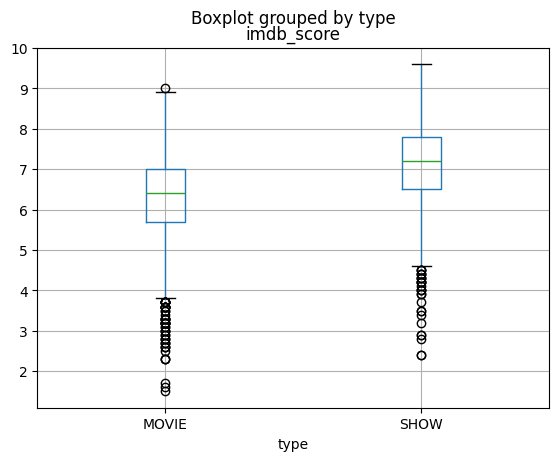

In [7]:
integrate_titles.boxplot(column='imdb_score', by='type')

sembrerebbe che i due box plots si sovrappongano, ma che, in generale, la mediana della valutazione per le serie sia maggiore rispetto ai movie. 
Ripetiamo ora la stessa cosa per tmdb_score

<Axes: title={'center': 'tmdb_score'}, xlabel='type'>

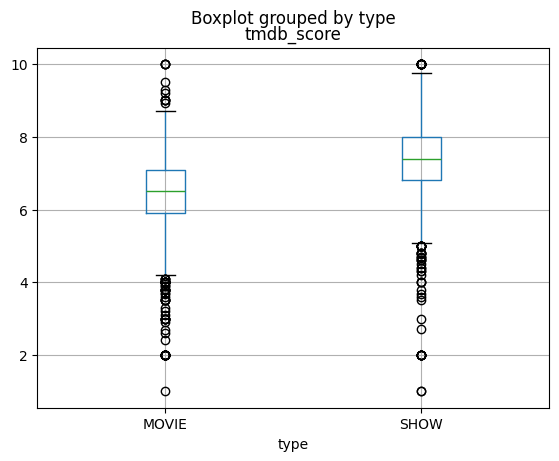

In [8]:
integrate_titles.boxplot(column='tmdb_score', by='type')

troviamo un andamento simile per il tmdb_score. 
A questo punto ci chiediamo, questa differenza è statisticamente significativa? come possiamo fare per dimostrarlo?

Possiamo utilizzare un test statistico. Proviamo con un t-test. 

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Prima di tutto, stampiamo il numero di elementi per le due classi (SHOW e MOVIE)

In [9]:
conteggio_tipi = integrate_titles['type'].value_counts()
print(conteggio_tipi)

type
MOVIE    2525
SHOW     1543
Name: count, dtype: int64


le ipotesi sono verificate, quindi possiamo applicare un t-test.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = le media di imdb_score di SHOW e MOVIE non sono statisticamente diverse;

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [10]:
#campioniamo i dati
strato_movie = integrate_titles[integrate_titles['type']=='MOVIE']
strato_show = integrate_titles[integrate_titles['type']=='SHOW']
campione_movie = strato_movie.sample(n=100) # 100 è sia > 30 e 100 * 10 è < 2525
campione_show = strato_show.sample(n=100) # 100 è sia > 30 e 100 * 10 è < 1543
campione_totale = pd.concat([campione_movie, campione_show])
#estraiamo i punteggi imdb
imdb_score_movie = campione_totale[campione_totale['type'] == 'MOVIE']['imdb_score']
imdb_score_show = campione_totale[campione_totale['type'] == 'SHOW']['imdb_score']

#importiamo ttest_ind per fare il t-test
from scipy.stats import ttest_ind


#eseguiamo il t-test usando il campione che riteniamo sia rappresentativo
t_stat, p_value = ttest_ind(imdb_score_movie, imdb_score_show)
#stampiamo il risultato
print("Statistiche del t-test",t_stat)
print("p value:", p_value)

Statistiche del t-test -5.907886449891345
p value: 1.4899028785437671e-08


che cosa deduciamo da questo?

siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

verifichiamo ora che la media dello score dei film sia più bassa rispetto a quella degli show. Dobbiamo usare il t-test ad una coda. Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = la media di imdb_score dei film è inferiore rispetto a quella degli show. 

ipotesi alternativa

HA = la media di imdb_score dei film è maggiore o uguale rispetto a quella degli show. 


significatività = 0.05

In [11]:
# Eseguiamo il t-test ad una coda con direzione positiva
# (testando come ipotesi alternativa quella che media(film)>=media(show)
t_stat, p_value = ttest_ind(imdb_score_movie, imdb_score_show, alternative='greater')

print("Statistiche del t-test:", t_stat)
print("Valore p:", p_value)


Statistiche del t-test: -5.907886449891345
Valore p: 0.9999999925504856


e facciamo anche un'ultima prova come sanity check, verificando l'alternativa rimasta.

In [12]:
# Eseguiamo il t-test ad una coda con direzione negativa
t_stat, p_value = ttest_ind(imdb_score_movie, imdb_score_show, alternative='less')
print("Statistiche del t-test:", t_stat)
print("p-value:", p_value)



Statistiche del t-test: -5.907886449891345
p-value: 7.449514392718836e-09


siccome il p-value è molto più piccolo di 0.05 possiamo rifiutare l'ipotesi nulla, secondo cui media(film) non è inferiore di media(show) a favore di quella alternativa, secondo cui media(film) è inferiore rispetto a media(show)

ripetete quanto appena fatto per lo score di tmdb (applicate l'ipotesi che ritenete più corretta, usando i box plots per avere l'idea precisa).

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = le media di tmdb_score di SHOW e MOVIE non sono statisticamente diverse;

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [13]:
tmdb_score_movie = campione_totale[campione_totale['type'] == 'MOVIE']['tmdb_score']
tmdb_score_show = campione_totale[campione_totale['type'] == 'SHOW']['tmdb_score']

#importiamo ttest_ind per fare il t-test
from scipy.stats import ttest_ind


#eseguiamo il t-test usando il campione che riteniamo sia rappresentativo
t_stat, p_value = ttest_ind(tmdb_score_movie, tmdb_score_show)
#stampiamo il risultato
print("Statistiche del t-test",t_stat)
print("p value:", p_value)

Statistiche del t-test -5.599513073687248
p value: 7.112306355412391e-08


siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

verifichiamo ora che la media dello score dei film sia più bassa rispetto a quella degli show. Dobbiamo usare il t-test ad una coda. Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = la media di tmdb_score dei film è inferiore rispetto a quella degli show. 

ipotesi alternativa

HA = la media di tmdb_score dei film è maggiore o uguale rispetto a quella degli show. 


significatività = 0.05

In [14]:
# Eseguiamo il t-test ad una coda con direzione positiva
# (testando come ipotesi alternativa quella che media(film)>=media(show)
t_stat, p_value = ttest_ind(tmdb_score_movie, tmdb_score_show, alternative='greater')

print("Statistiche del t-test:", t_stat)
print("p-value:", p_value)


Statistiche del t-test: -5.599513073687248
p-value: 0.9999999644384683


e facciamo anche un'ultima prova come sanity check, verificando l'alternativa rimasta.

In [15]:
# Eseguiamo il t-test ad una coda con direzione negativa
t_stat, p_value = ttest_ind(tmdb_score_movie, tmdb_score_show, alternative='less')

print("Statistiche del t-test:", t_stat)
print("p-value:", p_value)

Statistiche del t-test: -5.599513073687248
p-value: 3.5561531777061955e-08


siccome il p-value è motlo più piccolo di 0.05 possiamo rifiutare l'ipotesi nulla, secondo cui media(film) non è inferiore di media(show) a favore di quella alternativa, secondo cui media(film) è inferiore rispetto a media(show)

adesso approfondiamo la nostra analisi, prima di tutto visualizzando lo score dei film vecchi (prima del 2010) e recenti (post 2010).
Innanzitutto, creiamo una nuova colonna che ci dica se il film è vecchio o nuovo, secondo questa classificazione. Potremmo mettere 1 se è vecchio e 0 altrimenti. 

In [16]:
# Filtra il DataFrame per i film e crea una copia indipendente
film_df = integrate_titles[integrate_titles['type'] == 'MOVIE'].copy()

# Assegna 1 ai film con release_year anteriore al 2010, altrimenti assegna 0
film_df.loc[film_df['release_year'] < 2010, 'vecchio'] = 1
film_df.loc[film_df['release_year'] >= 2010, 'vecchio'] = 0

stampiamo il risultato (primi 50 elementi)

In [17]:
selected = ['vecchio', 'imdb_score']
film_df[selected].head(50)

,vecchio,imdb_score
0,1.0,8.1
1,1.0,7.2
2,1.0,7.3
3,1.0,8.2
5,1.0,7.5
6,1.0,7.5
7,1.0,8.1
8,1.0,4.8
9,1.0,6.8
10,1.0,6.4


quindi visualizziamo con box plot

<Axes: title={'center': 'imdb_score'}, xlabel='vecchio'>

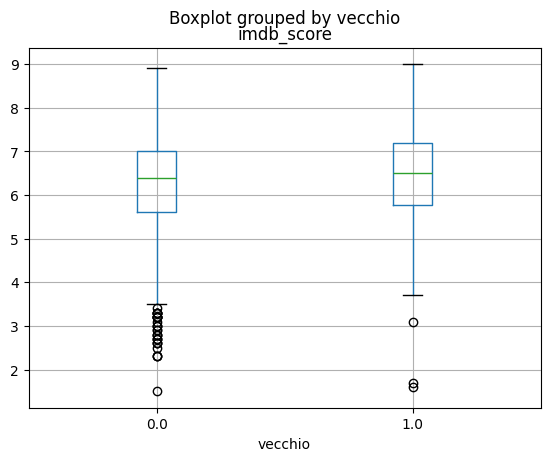

In [18]:
film_df.boxplot(column='imdb_score', by='vecchio')

vi sembra che ci sia una differenza statistica tra le due classi che abbiamo creato?
utilizziamo un t-test. Ripetiamo le verifiche necessarie, e poi eseguiamo il t-test. 

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95). 

ipotesi nulla 

H0 = le media di imdb_score dei film old e recenti non sono statisticamente diverse

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [19]:
conteggio_vecchi_non_vecchi = film_df['vecchio'].value_counts()
print(conteggio_vecchi_non_vecchi)

vecchio
0.0    2001
1.0     524
Name: count, dtype: int64


In [20]:
#campioniamo i dati
strato_vecchio = film_df[film_df['vecchio']==1]
strato_nuovo = film_df[film_df['vecchio']==0]
campione_vecchio = strato_vecchio.sample(n=40)
campione_nuovo = strato_nuovo.sample(n=40)
campione_totale = pd.concat([campione_vecchio, campione_nuovo])
#estraiamo i punteggi imdb
imdb_score_vecchio = campione_totale[campione_totale['vecchio'] == 1]['imdb_score']
imdb_score_nuovo = campione_totale[campione_totale['vecchio'] == 0]['imdb_score']

#importiamo ttest_ind per fare il t-test
from scipy.stats import ttest_ind

#eseguiamo il t-test usando il campione che riteniamo sia rappresentativo
t_stat, p_value = ttest_ind(imdb_score_vecchio, imdb_score_nuovo)
#stampiamo il risultato
print("Statistiche del t-test",t_stat)
print("p value:", p_value)


Statistiche del t-test -0.3110951478807474
p value: 0.7565581817111067


Deducete voi i risultati di questo t-test, e ditemi se vi torna il risultato. 
## mia opinione:
siccome il p-value è maggiore della significatività (0.34>0.05) NON possiamo rigettare l'ipotesi nulla (secondo la quale le medie non sarebbero statisticamente diverse)


A questo punto, utilizziamo le colonne  quantize_imdb_score e quantize_release_year che abbiamo prodotto durante lo scorso laboratorio. 
Recuperiamo la rappresentazione OLAP, e visualizziamo il numero di MOVIE, con uno slicing, concentrandoci su quantize_imdb_score.


In [21]:
quantize_imdb_score = ['LOW','SUFFICIENT','GOOD','VERY GOOD','EXCELLENT']
quantize_release_year = ['VERY OLD','OLD','RECENT','VERY RECENT']
quantize_type = ['MOVIE','SHOW']
OLAP = np.zeros((5,4,2))
for z in range(0,len(quantize_type)):
  Awards_prog_z = integrate_titles[integrate_titles['type']==quantize_type[z]]
  for j in range(0,len(quantize_release_year)):
    for i in range(0,len(quantize_imdb_score)):
      OLAP[i,j,z] = np.sum((Awards_prog_z['imdb_score_quant'] == quantize_imdb_score[i]) &(Awards_prog_z['release_year_quant'] == quantize_release_year[j]))
print(OLAP)    

[[[  2.   0.]
  [ 18.   0.]
  [ 39.   8.]
  [179.  42.]]

 [[ 19.   1.]
  [ 41.   2.]
  [121.  29.]
  [430. 119.]]

 [[ 45.   0.]
  [ 82.  16.]
  [165.  46.]
  [668. 368.]]

 [[ 38.   0.]
  [ 41.  20.]
  [149.  89.]
  [388. 493.]]

 [[  6.   4.]
  [  7.  12.]
  [ 46.  92.]
  [ 41. 202.]]]


facciamo un dicing, concentrandoci su MOVIE e film VERY RECENT. 

In [22]:
imdb_score_nostro = OLAP [:, quantize_release_year.index('VERY RECENT'), quantize_type.index('MOVIE')]
print(imdb_score_nostro)

[179. 430. 668. 388.  41.]


Analizzando l'output qua sopra scopriamo che, tra i contenuti di tipo 'MOVIE' e che consideriamo VERY RECENT, ce ne sono:
* 39 valutati LOW
* 121 valutati SUFFICIENT
* 165 valutati GOOD
* 149 valutati VERY GOOD
* 46 valutati EXCELLENT

Utilizzando altri servizi di streaming, otteniamo una versione analoga delle colonne quantizzate, relative ai soli film recenti (gli stessi del nostro dataset), di questo tipo:

In [23]:
imdb_score_altri_servizi = [180,410,700,370,46]

vogliamo capire se i conteggi estratti dalle due diverse sorgenti (netflix e disney+ e altre due) appartengono alla stessa distribuzione.
Possiamo farlo applicando un test chi-quadrato.

Usiamo un Chi-quadrato per l'idoneita'. Condizioni.

Abbiamo almeno 5 conteggi? SI;
Le singole osservazioni sono indipendenti e le dimensioni della popolazione devono essere pari ad almeno 10 volte quelle del campione (10n < N). Verificata, abbiamo oltre 4000 film soltanto nel dataset Netflix e Disney+.

In [24]:
from scipy.stats import chisquare


chi2_stat, p_val = chisquare(f_obs=imdb_score_nostro, f_exp=imdb_score_altri_servizi)

print(chi2_stat)

3.8631763910555


interpretiamo i risultati del test:

i gradi di libertà sono n = (numero di colonne -1) = 5 - 1 = 4.

scegliamo un intervallo di confidenza di 0.95.

Prendendo la tabella del chi-quadrato, notiamo che il valore critico del Chi quadrato è 9.488, quindi il valore ottenuto è < del valore critico. 

Deduciamo allora che non possiamo rigettare l'ipotesi nulla, secondo cui gli indici imbd_score relativi ai due servizi di streaming seguono la stessa distribuzione. 


Dagli stessi servizi di streaming alternativi a Netflix e Disney plus, troviamo che i film con gradimento SUFFICIENT, hanno la seguente distribuzione in termini di anno di rilascio:

In [25]:
release_year_altri_servizi_old_movies = [20,42,250,299]

## interpretazione (penso): tra i film poco graditi (sufficienti):
* 20 sono molto vecchi (VERY OLD)
* 42 sono vecchi (OLD)
* 250 sono recenti (RECENT)
* 299 sono molto recenti (VERY RECENT)

verificate se i conteggi estratti dalle due sorgenti seguono la stessa distribuzione.

**tip** calcoliamo prima il numero di gradi di libertà, poi confrontiamo, al solito, il p-value ottenuto con il valore estratto dalla tabella del chi-quadrato.

In [26]:
#dicing su MOVIES e SUFFICIENT IMDB_SCORE
nostra_osservazione = OLAP [quantize_imdb_score.index('SUFFICIENT'), :, quantize_type.index('MOVIE')]
print("La nostra osservazione dal dicing", nostra_osservazione)

#test chi-quadrato idoneità
from scipy.stats import chisquare


chi2_stat, p_val = chisquare(f_obs=nostra_osservazione, f_exp=release_year_altri_servizi_old_movies)

print(chi2_stat)
print(p_val)


La nostra osservazione dal dicing [ 19.  41. 121. 430.]
124.03245835324097
1.0443875410416128e-26


commentate con le opportune conclusioni. 
## mia opinione
siccome i gradi di libertà sono 4-1=3 e siamo a 0.05 di significatività, abbiamo un valore critico di 7,815.
Avendo trovato un valore di chi quadro di 124 e rotti possiamo rifiutare l'ipotesi nulla, secondo cui gli indici release_year dei diversi servizi di streaming seguono la stessa distribuzione.
